In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [10]:
df[df['Exited']==0].drop('Exited', axis=1).describe().style.format("{:.2f}")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7963.00,7963.00,7963.00,7963.00,7963.00,7963.00,7963.00,7963.00
mean,651.85,37.41,5.03,72745.30,1.54,0.71,0.55,99738.39
std,95.65,10.13,2.88,62848.04,0.51,0.46,0.50,57405.59
min,405.00,18.00,0.00,0.00,1.00,0.00,0.00,90.07
25%,585.00,31.00,3.00,0.00,1.00,0.00,0.00,50783.49
50%,653.00,36.00,5.00,92072.68,2.00,1.00,1.00,99645.04
75%,718.00,41.00,7.00,126410.28,2.00,1.00,1.00,148609.96
max,850.00,92.00,10.00,221532.80,3.00,1.00,1.00,199992.48


In [11]:
df[df['Exited']==1].drop('Exited', axis=1).describe().style.format("{:.2f}")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2037.00,2037.00,2037.00,2037.00,2037.00,2037.00,2037.00,2037.00
mean,645.35,44.84,4.93,91108.54,1.48,0.70,0.36,101465.68
std,100.32,9.76,2.94,58360.79,0.80,0.46,0.48,57912.42
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,578.00,38.00,2.00,38340.02,1.00,0.00,0.00,51907.72
50%,646.00,45.00,5.00,109349.29,1.00,1.00,0.00,102460.84
75%,716.00,51.00,8.00,131433.33,2.00,1.00,1.00,152422.91
max,850.00,84.00,10.00,250898.09,4.00,1.00,1.00,199808.10


In [12]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
# Percentage per category for the target column.
percentage_labels = df['Exited'].value_counts(normalize = True) * 100
percentage_labels


0    79.63
1    20.37
Name: Exited, dtype: float64

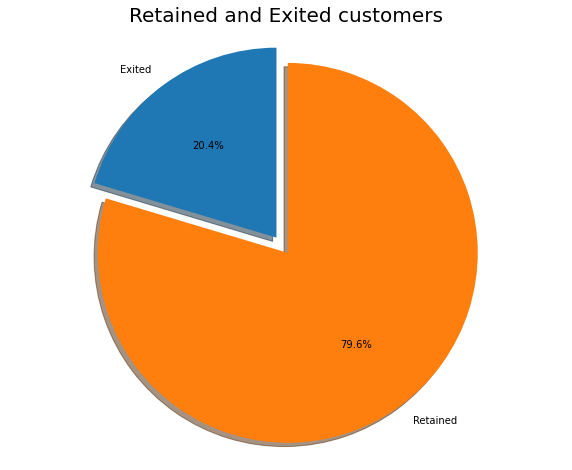

In [14]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Retained and Exited customers", size = 20)
plt.show()

In [15]:
country = list(df['Geography'].unique())
gender = list(df['Gender'].unique())

print(country)
print(gender)

['France', 'Spain', 'Germany']
['Female', 'Male']


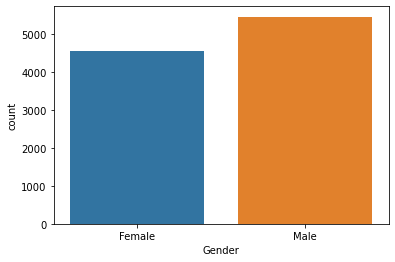

In [16]:
sns.countplot(x = 'Gender', data=df)


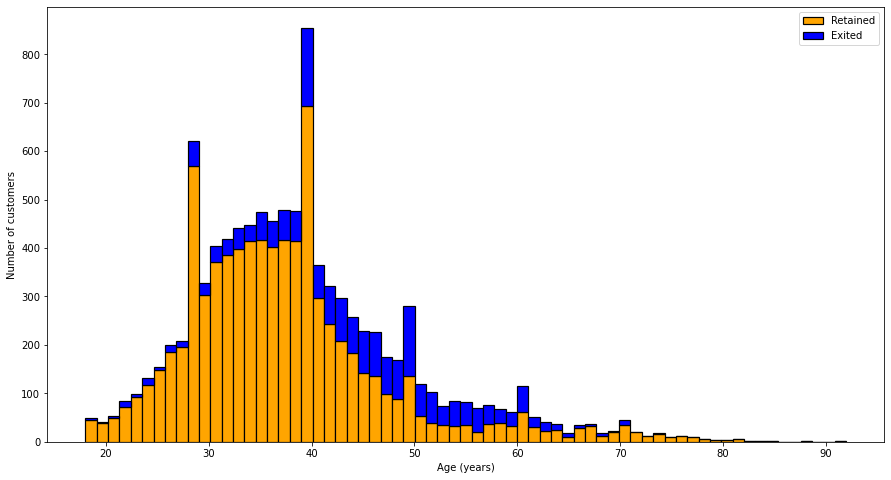

In [17]:
#Stacked histogram: Age
figure = plt.figure(figsize=(15,8))
plt.hist([
        df[(df.Exited==0)]['Age'],
        df[(df.Exited==1)]['Age']
        ], 
         stacked=True, color = ['orange','blue'],
         bins = 'auto',label = ['Retained','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.legend()

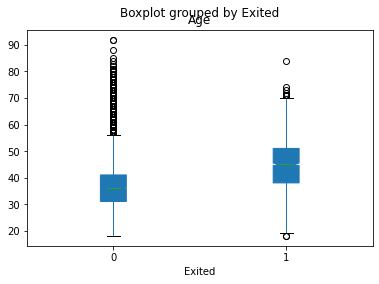

In [18]:
df.boxplot(by='Exited',column=['Age'],grid=False,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True)


Observations:

Older customers are more likely to churn
Credit Score does not seem to be a very distinguishing factors based on the distribution



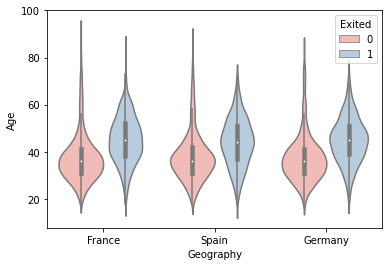

In [19]:
sns.violinplot(x="Geography", y="Age",hue='Exited', data=df, palette="Pastel1")


Observations:
German and older (by age) customers are more likely to churn



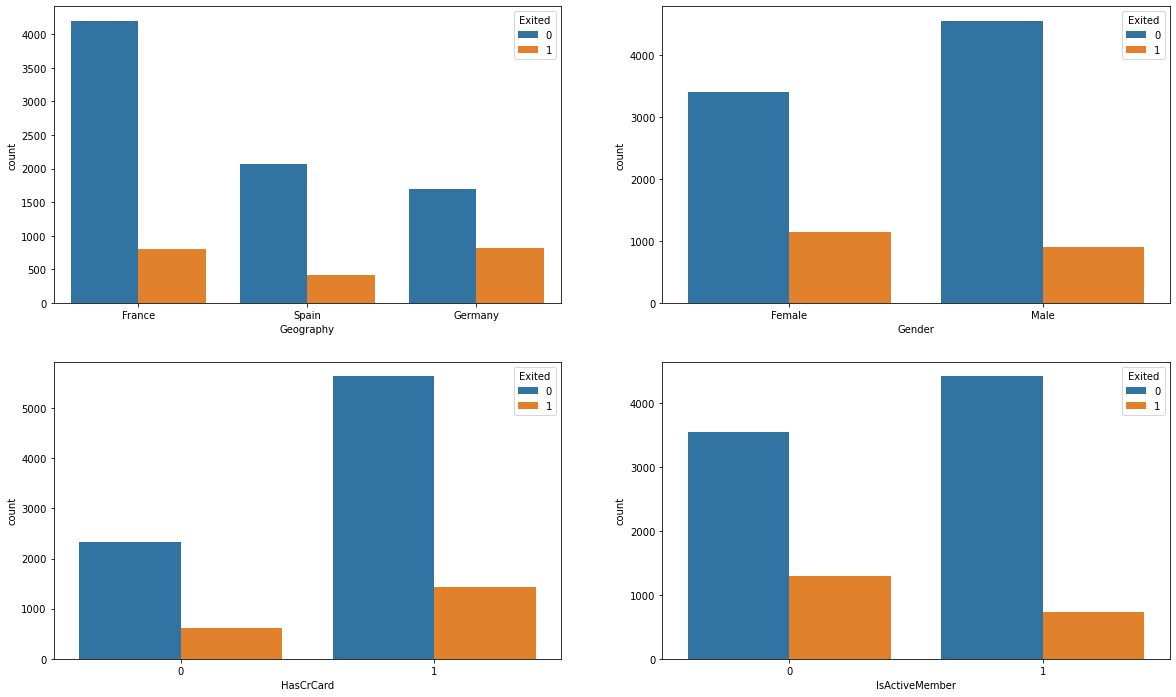

In [20]:
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

Observations:
37% of non-active members churn vs 17% of active members churn


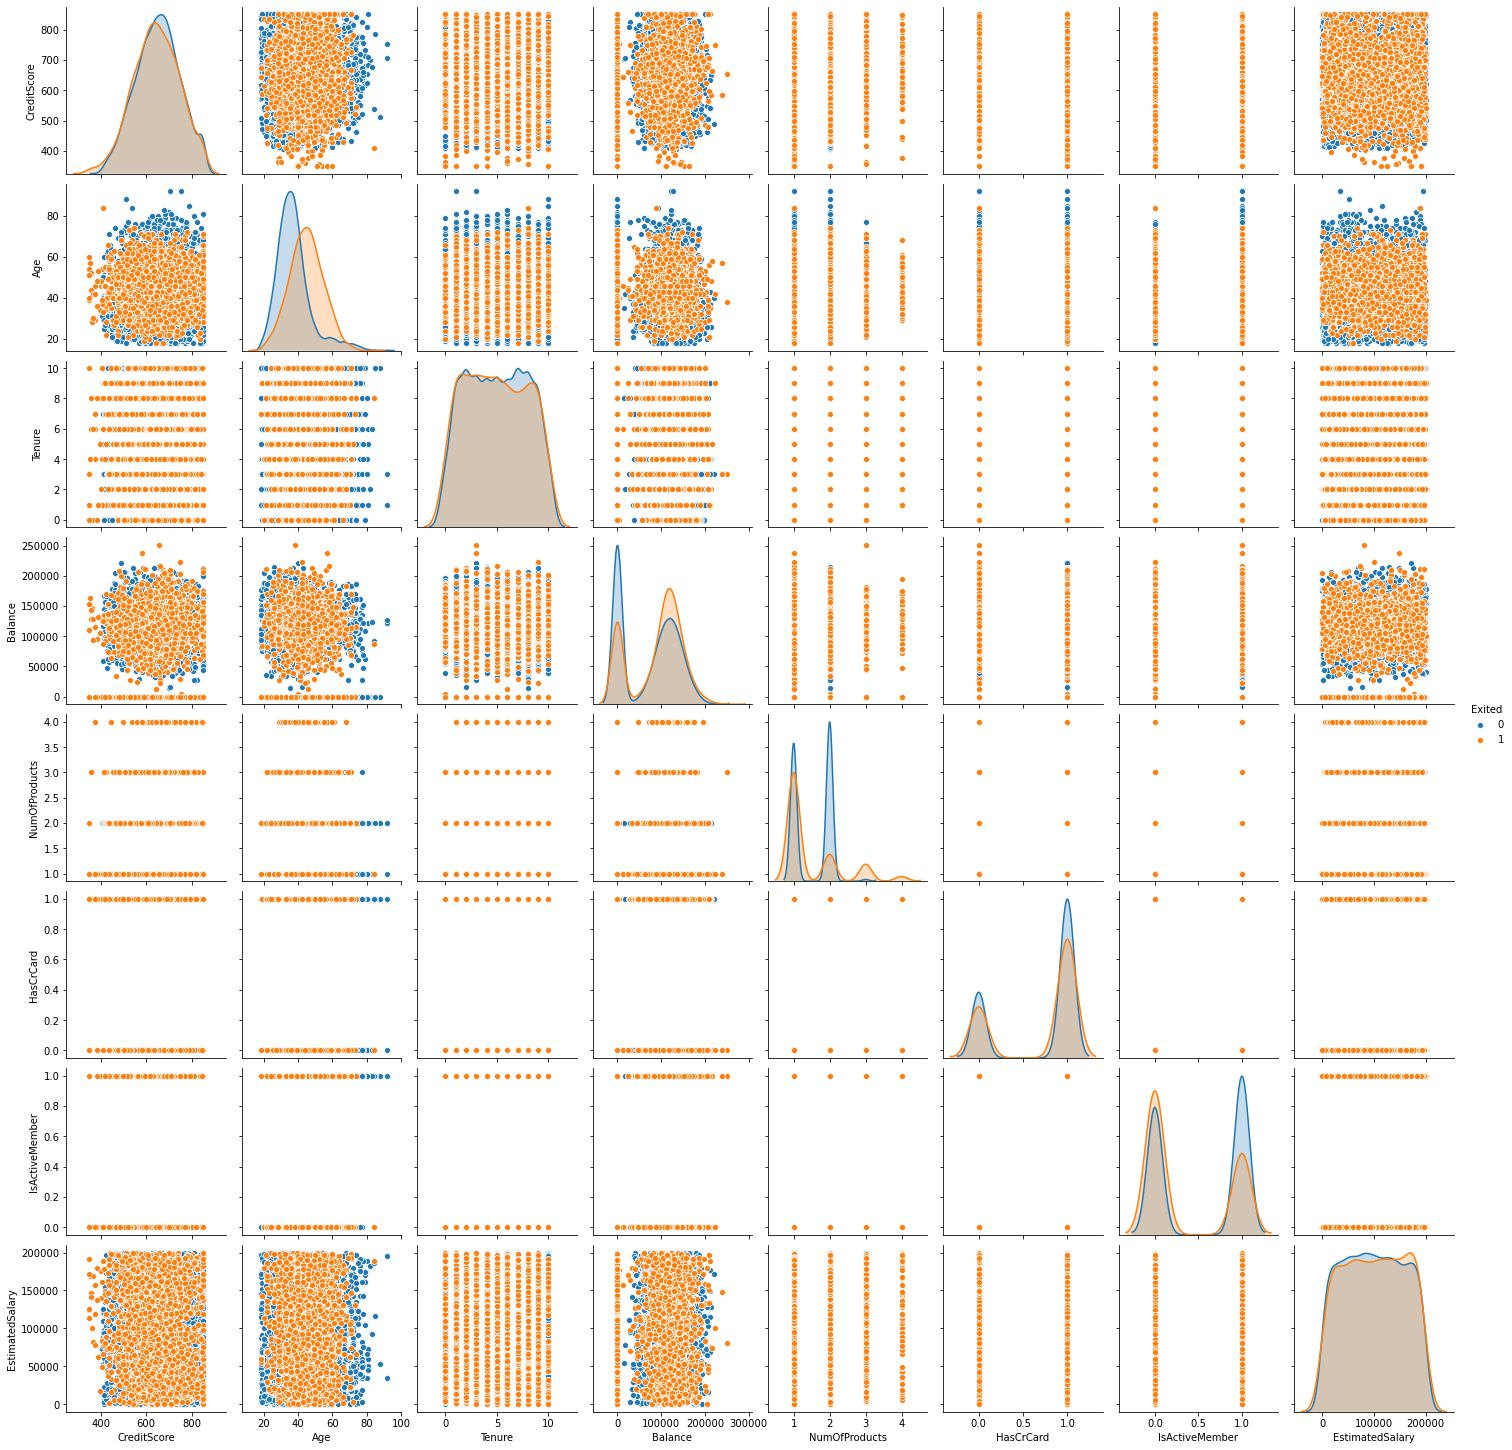

In [21]:
sns.pairplot(df, hue = 'Exited')

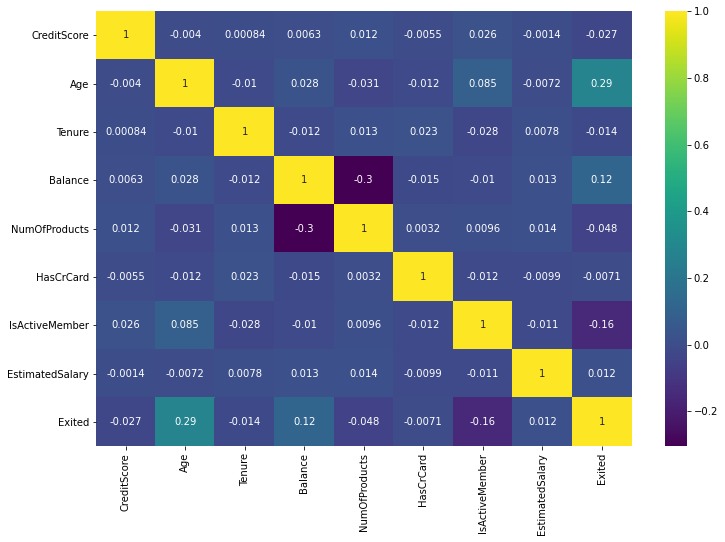

In [22]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='viridis')

Observations:
No concernable correlation is observed between any two variables


In [23]:
df.groupby('IsActiveMember')['Exited'].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

In [24]:
df2 = pd.get_dummies(df, columns=['Geography','Gender'])

df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [25]:
X = df2.drop(['Exited'], axis=1)
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [26]:
y = df2['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [27]:
def cross_validate_model(model, X, y, 
                         scoring=['f1', 'precision', 'recall', 'roc_auc'], 
                         cv=3, n_jobs=-1, verbose=True):

    
    scores = cross_validate(model, 
                        X, y, 
                        scoring=['f1', 'precision', 'recall', 'roc_auc'],    return_train_score=False)

    #sorted(scores.keys())
    dd={}
    
    for key, val in scores.items():
        if key in ['fit_time', 'score_time']:
            continue
        #print('{:>30}: {:>6.5f} +/- {:.5f}'.format(key, np.mean(val), np.std(val)) )
        name = " ".join(key.split('_')[1:]).capitalize()
        
        dd[name] = {'Value' : np.mean(val), 'Error' : np.std(val)}
        
    return  pd.DataFrame(dd)    
    #print()
    #pprint(scores)
    #print()

In [28]:
def plot_roc(model, X_test ,y_test, n_classes=0):
    
    from sklearn.metrics import roc_curve, auc
    
    """
    Target scores, can either be probability estimates 
    of the positive class, confidence values, or 
    non-thresholded measure of decisions (as returned 
    by “decision_function” on some classifiers).
    """
    try:
        y_score = model.decision_function(X_test)
    except Exception as e:
        y_score = model.predict_proba(X_test)[:,1]
    
    
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Compute micro-average ROC curve and ROC area
    #fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    #roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    #plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    #plt.show()
    
# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                    random_state=0)

In [29]:
def plot_confusion_matrix(model, X_test ,y_test,
                          classes=[0,1],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    import itertools
    from sklearn.metrics import confusion_matrix
    
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
def feature_importance(coef, names, verbose=False, plot=True):
    
    #importances = model.feature_importances_

    
    
    #std = np.std([tree.feature_importances_ for tree in model.estimators_],
    #             axis=0)
    indices = np.argsort(coef)[::-1]
    
    if verbose:
    
        # Print the feature ranking
        print("Feature ranking:")
    
        for f in range(len(names)):
            print("{:>2d}. {:>15}: {:.5f}".format(f + 1, names[indices[f]], coef[indices[f]]))
        
    if plot:
        
        # Plot the feature importances of the forest
        #plt.figure(figsize=(5,10))
        plt.title("Feature importances")
        plt.barh(range(len(names)), coef[indices][::-1], align="center")
        #plt.barh(range(X.shape[1]), importances[indices][::-1],
        #         xerr=std[indices][::-1], align="center")
        plt.yticks(range(len(names)), names[indices][::-1])
        #plt.xlim([-0.001, 1.1])
        #plt.show()

In [31]:
def plot_proba(model, X, y, bins=40, show_class = 1):
    
    from sklearn.calibration import CalibratedClassifierCV
    
    model = CalibratedClassifierCV(model)#, cv='prefit')
    
    model.fit(X, y)
    
    proba=model.predict_proba(X)
    
    if show_class == 0:
        sns.kdeplot(proba[y==0,0], shade=True, color="r", label='True class')
        sns.kdeplot(proba[y==0,1], shade=True, color="b", label='Wrong class')
        plt.title('Classification probability: Class 0')
    elif show_class == 1:
        sns.kdeplot(proba[y==1,1], shade=True, color="r", label='True class')
        sns.kdeplot(proba[y==1,0], shade=True, color="b", label='Wrong class')
        plt.title('Classification probability: Class 1')
    plt.legend()

# Logistic Regression

In [32]:
steps1 = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('model', LogisticRegression(random_state= 11))]

pipe1 = Pipeline(steps1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 11, stratify = y)
pipe1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=11))])

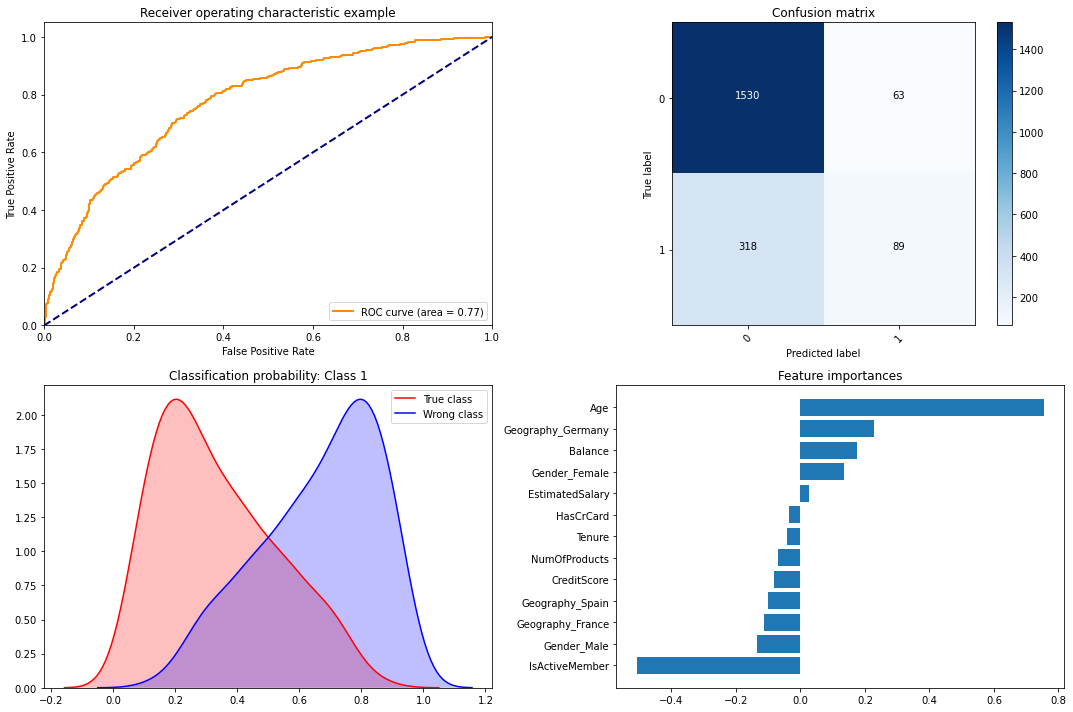

In [33]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plot_roc(pipe1, X_test, y_test)

plt.subplot(222)
plot_confusion_matrix(pipe1, X_test, y_test)

plt.subplot(223)
plot_proba(pipe1, X_test, y_test)

plt.subplot(224)
feature_importance(pipe1.named_steps['model'].coef_[0], X.columns)

plt.tight_layout()

In [34]:
pipe1.named_steps['model'].coef_[0]

array([-0.08,  0.76, -0.04,  0.18, -0.07, -0.04, -0.51,  0.03, -0.11,
        0.23, -0.1 ,  0.13, -0.13])

In [35]:
logit_xval_res = cross_validate_model(pipe1, X, y, verbose=False)
logit_xval_res.T[['Value','Error']].style.format("{:.2f}")

,Value,Error
F1,0.31,0.03
Precision,0.59,0.03
Recall,0.21,0.02
Roc auc,0.77,0.01


In [ ]:
show_summary_report(y_test, )

# Gradient Boosting


In [36]:
steps3 = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('model', GradientBoostingClassifier(n_estimators=250, learning_rate=0.05, random_state=11))]

pipe3 = Pipeline(steps3)

pipe3.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=250,
                                            random_state=11))])

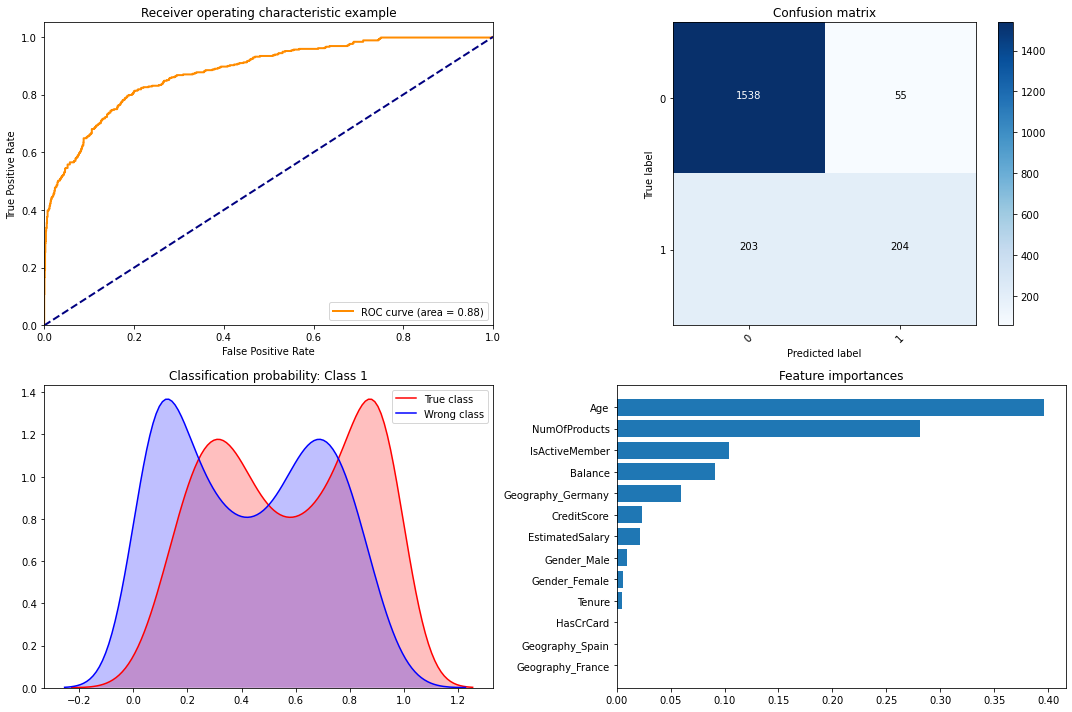

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plot_roc(pipe3, X_test, y_test)

plt.subplot(222)
plot_confusion_matrix(pipe3, X_test, y_test)

plt.subplot(223)
plot_proba(pipe3, X_test, y_test)

plt.subplot(224)
feature_importance(pipe3.named_steps['model'].feature_importances_, X.columns)

plt.tight_layout()

In [38]:
logit_xval_res = cross_validate_model(pipe3, X, y, verbose=False)
logit_xval_res.T[['Value','Error']].style.format("{:.2f}")

,Value,Error
F1,0.59,0.02
Precision,0.78,0.03
Recall,0.48,0.02
Roc auc,0.87,0.00


# Decision Trees

In [39]:
steps2 = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('model', DecisionTreeClassifier(random_state= 11))]

pipe2 = Pipeline(steps2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 11, stratify = y)
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(random_state=11))])

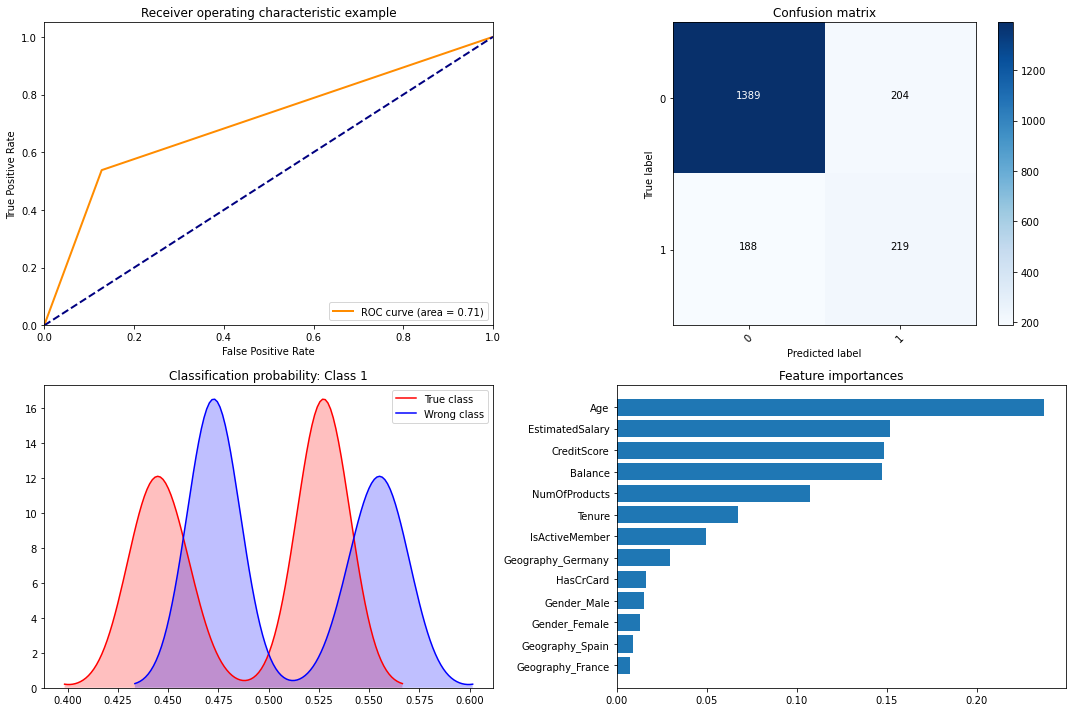

In [40]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plot_roc(pipe2, X_test, y_test)

plt.subplot(222)
plot_confusion_matrix(pipe2, X_test, y_test)

plt.subplot(223)
plot_proba(pipe2, X_test, y_test)

plt.subplot(224)
feature_importance(pipe2.named_steps['model'].feature_importances_, X.columns)

plt.tight_layout()

In [41]:
gbc_xval_res = cross_validate_model(pipe2, X, y, verbose=False)
gbc_xval_res.T[['Value','Error']].style.format("{:.2f}")

,Value,Error
F1,0.50,0.02
Precision,0.49,0.01
Recall,0.51,0.03
Roc auc,0.69,0.01


# Random Forest Classifier

In [49]:
steps4 = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('model', RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state= 11))]

pipe4 = Pipeline(steps4)

pipe4.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                        random_state=11))])

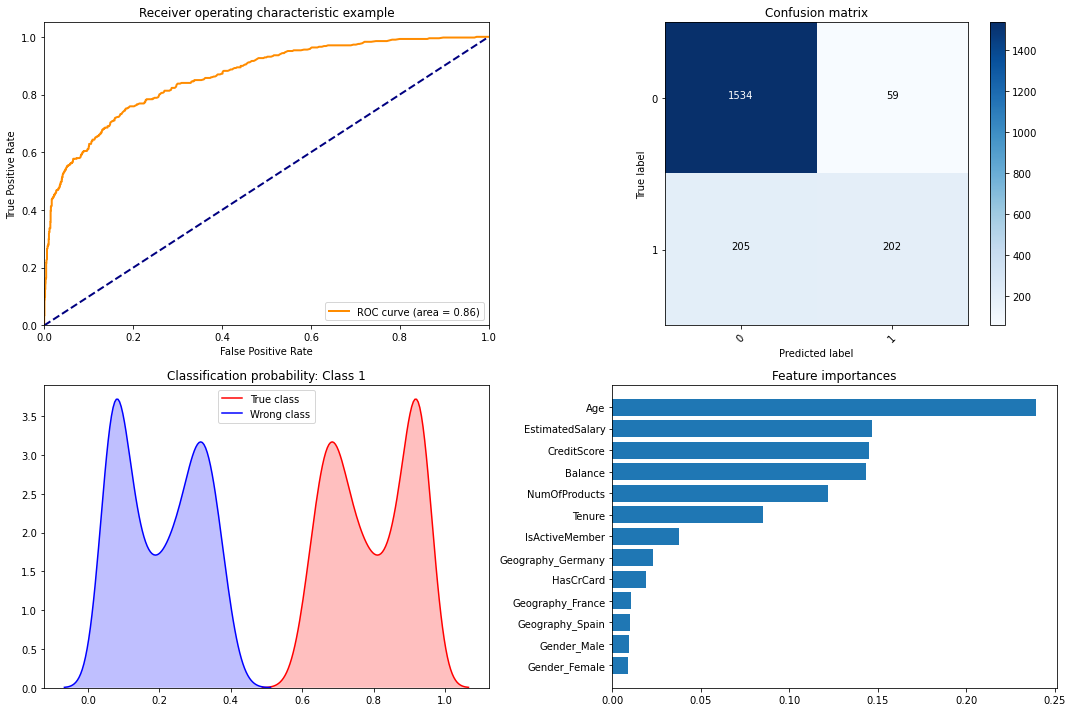

In [50]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plot_roc(pipe4, X_test,y_test)

plt.subplot(222)
plot_confusion_matrix(pipe4, X_test, y_test)

plt.subplot(223)
plot_proba(pipe4, X_test, y_test)

plt.subplot(224)
feature_importance(pipe4.named_steps['model'].feature_importances_, X.columns)

plt.tight_layout()

In [51]:
rfc_xval_res = cross_validate_model(pipe4, X, y, verbose=False)
rfc_xval_res.T[['Value','Error']].style.format("{:.2f}")

,Value,Error
F1,0.58,0.02
Precision,0.78,0.02
Recall,0.47,0.02
Roc auc,0.85,0.01


# 4.5 Extremely Randomised Trees


In [45]:
steps5 = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
         ('model', ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0, class_weight='balanced'))]

pipe5 = Pipeline(steps5)

pipe5.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 ExtraTreesClassifier(class_weight='balanced', n_estimators=250,
                                      n_jobs=-1, random_state=0))])

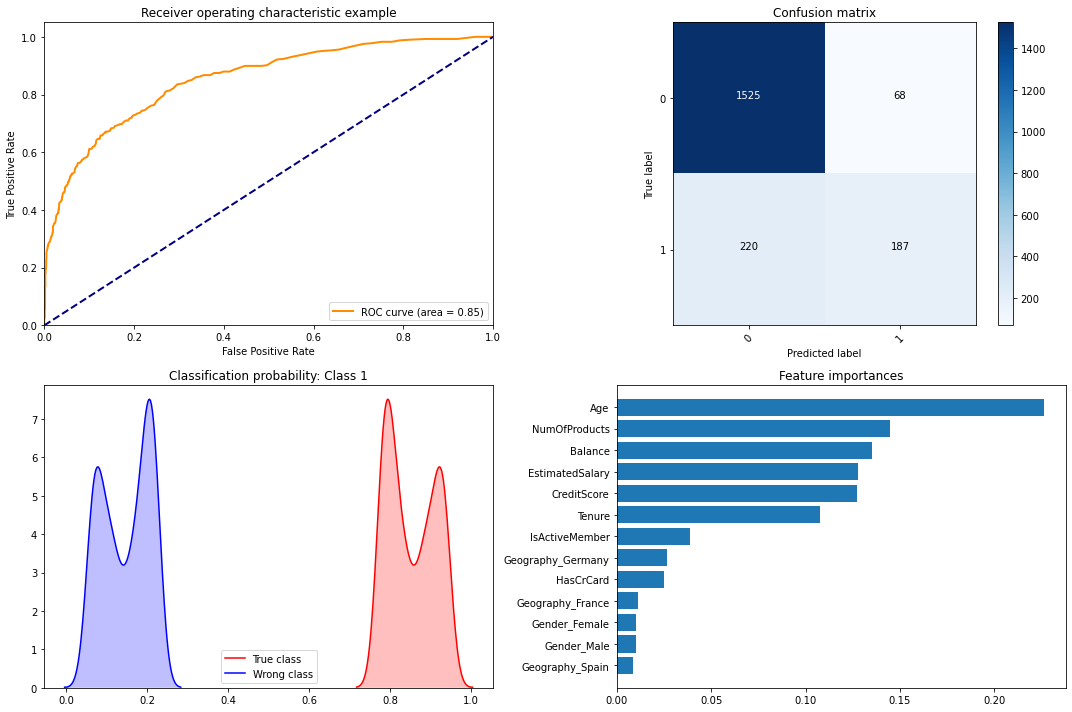

In [46]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plot_roc(pipe5, X_test ,y_test)

plt.subplot(222)
plot_confusion_matrix(pipe5, X_test ,y_test)

plt.subplot(223)
plot_proba(pipe5, X_test, y_test)

plt.subplot(224)
feature_importance(pipe5.named_steps['model'].feature_importances_, X.columns)

plt.tight_layout()

In [47]:
ert_xval_res = cross_validate_model(pipe5, X, y, verbose=False)
ert_xval_res.T[['Value','Error']].style.format("{:.2f}")

,Value,Error
F1,0.54,0.03
Precision,0.75,0.02
Recall,0.42,0.03
Roc auc,0.84,0.00


In [48]:
from collections import OrderedDict

res_comp = OrderedDict([
    ('Logistic Regression'              , logit_xval_res[0:1]),
    ('Random Forest Classifier'         , rfc_xval_res[0:1]  ),
    ('Extermely Random Tree Classifier' , ert_xval_res[0:1]  ),
    ('Gradient Boost Classifier'        , gbc_xval_res[0:1]  ),
])

new_columns = {'level_0' : 'Model'}

pd.concat(res_comp).reset_index().drop('level_1', axis=1).rename(columns=new_columns).set_index('Model').sort_values('F1', ascending=False).style.format("{:.2f}")

,F1,Precision,Recall,Roc auc
Model,,,,
Logistic Regression,0.59,0.78,0.48,0.87
Random Forest Classifier,0.58,0.77,0.47,0.85
Extermely Random Tree Classifier,0.54,0.75,0.42,0.84
Gradient Boost Classifier,0.50,0.49,0.51,0.69
